In [9]:
# pip install dgl

In [10]:
# https://paperswithcode.com/dataset/csl
# https://github.com/graphdeeplearning/benchmarking-gnns/blob/master/docs/02_download_datasets.md

In [11]:
import os
import pickle
import sys
import time
import warnings

import matplotlib.pyplot as plt
import networkx as nx
import torch

warnings.filterwarnings("ignore")

import dgl

dgl.__version__

sys.path.append("../")
from src.utils import CSL

In [12]:
print("[I] Loading data (notebook) ...")
dataset = CSL()
print("[I] Finished loading.")

[I] Loading data (notebook) ...
[I] Preparing Circular Skip Link Graphs v4 ...
[I] Finished preparation after 0.4182s
[I] Finished loading.


In [13]:
# preview 5 out of 150 graphs in the collection
dataset.graph_lists[:5]

[Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=41, num_edges=164,
       ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)})]

In [14]:
# multi-class classification
dataset.graph_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9])

(Graph(num_nodes=41, num_edges=164,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor(0))


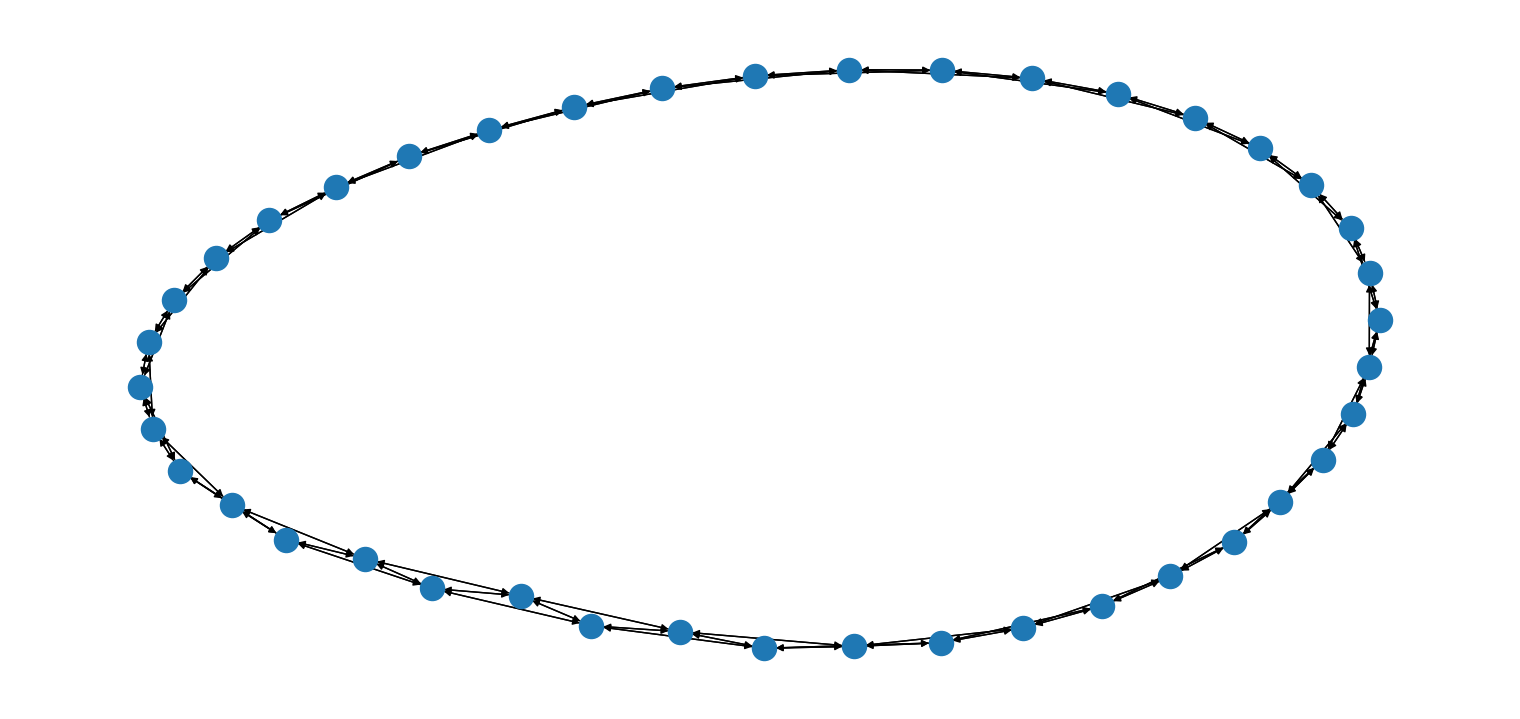

In [15]:
# draw 1 out of 150 graphs in the collection

tf_G = dataset[0]  # tensor graph object
print(tf_G)

# convert tensor to networkx class instance
G = dgl.to_networkx(tf_G[0])
plt.figure(figsize=[15, 7])
nx.draw(G)